In [20]:
# import tensorflow
import tensorflow as tf
# To plot the image
import matplotlib.pyplot as plt
# to handle the  data structure
import numpy as np

In [21]:
# Download the MNIST dataset
mnist = tf.keras.datasets.mnist

# Splitting it into training and testing population
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

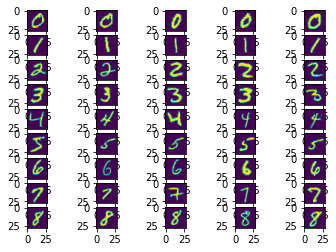

In [22]:
# visualize the dataset
fig, axarr = plt.subplots(9,5)
for i in range(9):
  for j,k in enumerate(np.where(y_train==i)[0][0:5]):
    axarr[i,j].imshow(x_train[k])
plt.show()

In [23]:
# Create a model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'), #"linear", "relu","sigmoid","tanh"
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,tf.keras.layers.Softmax())
])

# visualize model
model.summary()

print("Model Input:",model.input.shape)
print("Model Input:",model.output.shape)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [24]:
# Reshape the data to make it cimpaitable for the training and testing
x_train=np.reshape(x_train,(x_train.shape[0],28,28,1))
x_test=np.reshape(x_test,(x_test.shape[0],28,28,1))
print('Training samples:',x_train.shape)
print('training labels:',x_test.shape)

Training samples: (60000, 28, 28, 1)
training labels: (60000,)


In [25]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [26]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 38s 5ms/step - loss: 1.5444 - accuracy: 0.9198
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4892 - accuracy: 0.9726
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4835 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4796 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4788 - accuracy: 0.9824


In [28]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.4786 - accuracy: 0.9827


[1.4785531759262085, 0.982699990272522]

In [29]:
predictions=model.predict(x_test)
for i,p in enumerate(predictions):
  print("Actual label:",y_test[i],"Predicted Label:",np.where(p==np.max(p))[0][0],"Probability",np.max(p))

Streaming output truncated to the last 5000 lines.
Actual label: 3 Predicted Label: 3 Probability 1.0
Actual label: 9 Predicted Label: 9 Probability 1.0
Actual label: 9 Predicted Label: 9 Probability 1.0
Actual label: 8 Predicted Label: 8 Probability 1.0
Actual label: 4 Predicted Label: 4 Probability 1.0
Actual label: 1 Predicted Label: 1 Probability 1.0
Actual label: 0 Predicted Label: 0 Probability 1.0
Actual label: 6 Predicted Label: 6 Probability 1.0
Actual label: 0 Predicted Label: 0 Probability 1.0
Actual label: 9 Predicted Label: 9 Probability 1.0
Actual label: 6 Predicted Label: 6 Probability 1.0
Actual label: 8 Predicted Label: 8 Probability 1.0
Actual label: 6 Predicted Label: 6 Probability 1.0
Actual label: 1 Predicted Label: 1 Probability 1.0
Actual label: 1 Predicted Label: 1 Probability 1.0
Actual label: 9 Predicted Label: 9 Probability 1.0
Actual label: 8 Predicted Label: 8 Probability 1.0
Actual label: 9 Predicted Label: 9 Probability 1.0
Actual label: 2 Predicted Label